In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from apyori import apriori

In [11]:
df = pd.read_csv('Groceries_dataset.csv')
df.sample(5)

,Member_number,Date,itemDescription
13040,1718,03-12-2014,domestic eggs
12890,4854,23-12-2014,root vegetables
17245,2287,16-12-2015,tropical fruit
12078,2363,03-12-2014,white bread
18961,1321,13-04-2015,soda


In [12]:
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [15]:
df.Member_number.nunique()

3898

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'whole milk'),
  Text(1, 0, 'other vegetables'),
  Text(2, 0, 'rolls/buns'),
  Text(3, 0, 'soda'),
  Text(4, 0, 'yogurt'),
  Text(5, 0, 'root vegetables'),
  Text(6, 0, 'tropical fruit'),
  Text(7, 0, 'bottled water'),
  Text(8, 0, 'sausage'),
  Text(9, 0, 'citrus fruit'),
  Text(10, 0, 'pastry'),
  Text(11, 0, 'pip fruit'),
  Text(12, 0, 'shopping bags'),
  Text(13, 0, 'canned beer'),
  Text(14, 0, 'bottled beer'),
  Text(15, 0, 'whipped/sour cream'),
  Text(16, 0, 'newspapers'),
  Text(17, 0, 'frankfurter'),
  Text(18, 0, 'brown bread'),
  Text(19, 0, 'pork')])

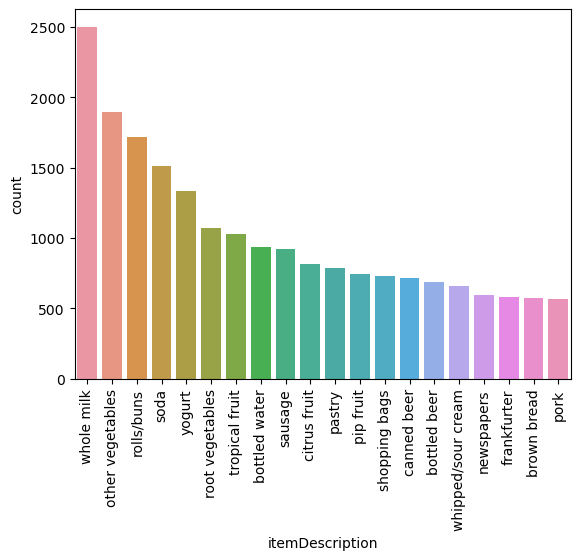

In [21]:
sns.countplot(x = df.itemDescription, order = pd.value_counts(df.itemDescription).iloc[:20].index)
plt.xticks(rotation = 90)

In [23]:
# pip install mlxtend

In [24]:
from mlxtend.frequent_patterns import association_rules, apriori

In [25]:
df_sum = df.groupby(['Member_number','itemDescription'])['itemDescription'].count().reset_index(name = 'Count')
df_sum

,Member_number,itemDescription,Count
0,1000,canned beer,1
1,1000,hygiene articles,1
2,1000,misc. beverages,1
3,1000,pastry,1
4,1000,pickled vegetables,1
...,...,...,...
34761,5000,onions,1
34762,5000,other vegetables,1
34763,5000,root vegetables,1
34764,5000,semi-finished bread,1


In [26]:
# making a mxn matrice where m=transaction and n=items and each row represents whether the item was in the transaction or not
table = df_sum.pivot_table(index='Member_number', columns='itemDescription', values='Count', aggfunc='sum').fillna(0)
table.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [27]:
# making a function which returns 0 or 1
# 0 means item was not in that transaction, 1 means item present in that transaction
def hot_encode(x): 
    if(x == 0): 
        return 0
    if(x > 0): 
        return 1
    
final_table = table.applymap(hot_encode)
final_table.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
# using the 'apriori algorithm' with min_support=0.015 (1.5% of 9465)
# It means the item should be present in atleast 142 transaction out of 9465 transactions only when we considered that item in
# frequent itemset

frequence = apriori(final_table, min_support=0.015, use_colnames=True)
rules = association_rules(frequence, metric="lift", min_threshold=1)

# now making the rules from frequent itemset generated above
rules.sort_values('confidence', ascending = False, inplace=True)
rules

C:\Users\Shahirah\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4975,"(butter, other vegetables, yogurt)",(whole milk),0.022319,0.458184,0.015649,0.701149,1.530280,0.005423,1.813001,0.354436
5494,"(yogurt, pastry, rolls/buns)",(whole milk),0.022319,0.458184,0.015393,0.689655,1.505194,0.005166,1.745853,0.343296
5157,"(other vegetables, pastry, yogurt)",(whole milk),0.026167,0.458184,0.017958,0.686275,1.497815,0.005969,1.727040,0.341292
4919,"(other vegetables, bottled water, yogurt)",(whole milk),0.032324,0.458184,0.022063,0.682540,1.489664,0.007252,1.706721,0.339688
3072,"(domestic eggs, pastry)",(whole milk),0.028476,0.458184,0.019241,0.675676,1.474683,0.006193,1.670600,0.331323
...,...,...,...,...,...,...,...,...,...,...
5140,(whole milk),"(frankfurter, other vegetables, yogurt)",0.458184,0.022576,0.015136,0.033035,1.463288,0.004792,1.010816,0.584345
27,(whole milk),(baking powder),0.458184,0.031042,0.015136,0.033035,1.064209,0.000913,1.002061,0.111357
4875,(whole milk),"(other vegetables, bottled water, root vegetab...",0.458184,0.025911,0.015136,0.033035,1.274944,0.003264,1.007367,0.398016
5098,(whole milk),"(citrus fruit, soda, yogurt)",0.458184,0.023602,0.015136,0.033035,1.399666,0.004322,1.009755,0.527013


In [29]:
# arranging the data from highest to lowest with respect to 'confidence'

rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4975,"(butter, other vegetables, yogurt)",(whole milk),0.022319,0.458184,0.015649,0.701149,1.530280,0.005423,1.813001,0.354436
5494,"(yogurt, pastry, rolls/buns)",(whole milk),0.022319,0.458184,0.015393,0.689655,1.505194,0.005166,1.745853,0.343296
5157,"(other vegetables, pastry, yogurt)",(whole milk),0.026167,0.458184,0.017958,0.686275,1.497815,0.005969,1.727040,0.341292
4919,"(other vegetables, bottled water, yogurt)",(whole milk),0.032324,0.458184,0.022063,0.682540,1.489664,0.007252,1.706721,0.339688
3072,"(domestic eggs, pastry)",(whole milk),0.028476,0.458184,0.019241,0.675676,1.474683,0.006193,1.670600,0.331323
...,...,...,...,...,...,...,...,...,...,...
3568,(whole milk),"(pastry, newspapers)",0.458184,0.026680,0.015136,0.033035,1.238167,0.002911,1.006571,0.355017
5015,(whole milk),"(canned beer, soda, other vegetables)",0.458184,0.023089,0.015136,0.033035,1.430770,0.004557,1.010286,0.555679
2614,(whole milk),"(citrus fruit, curd)",0.458184,0.025654,0.015136,0.033035,1.287693,0.003382,1.007633,0.412349
4917,(whole milk),"(other vegetables, bottled water, tropical fruit)",0.458184,0.025654,0.015136,0.033035,1.287693,0.003382,1.007633,0.412349
